In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Read data from csv
df=pd.read_csv("data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Obtain 8 data summarizations
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
# Obtain non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Obtain if any column has null values
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [12]:
# The diagnosis of breast tissues (M = malignant, B = benign)
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [13]:
# ID data not required
df.drop(columns = ['id'], inplace =True)

In [14]:
# Remove unnamed info
df.drop(df.columns[df.columns.str.contains('unnamed', case =False)], axis=1, inplace=True)

In [16]:
# Check for repeated values
df.duplicated().sum()

0

In [17]:
# Convert diagnosis column data to numerical
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})

In [19]:
# Sepearate diagnosis column for prediction
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [20]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)

In [37]:
# Split train and test data using random state for consistency and 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

LRC = LogisticRegression()
LRC.fit(X_train, y_train)

y_pred = LRC.predict(X_test)

In [39]:
# First 5 results
y_pred[:5]

array([0, 1, 1, 0, 0])

In [40]:
y_test[:5]

,diagnosis
204,0
70,1
131,1
431,0
540,0


In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9824561403508771


In [42]:
#Hyperparameter tuning
''' C for Regularization strength (inverse of lambda) - > Smaller values = stronger regularization.
max_iter -> Number of iterations for optimization.
solver='liblinear' -> Optimization algorithm (used for small datasets). '''
param_grid ={
    'C' : [0.1, 1, 10, 100],
    'max_iter' : [1000, 2000, 3000],
    'solver' : ['liblinear']
}
from sklearn.model_selection import GridSearchCV
GS_CV = GridSearchCV(LogisticRegression(), param_grid, cv =5). # Uses 5 cross fold validation
GS_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [1000, 2000, 3000],
                         'solver': ['liblinear']})

In [49]:
GS_CV.best_params_ # Returns the best combination of hyperparameters found during Grid Search.
grid_search_model = GS_CV.best_estimator_ # Retreive best model found by GridSearchCV
y_pred = grid_search_model.predict(X_test)

In [50]:
# Since 5-fold cross-validation is used, the model is trained 12 × 5 = 60 times.
accuracy_score(y_test, y_pred)

0.9941520467836257

In [51]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Benign (0)", "Malignant (1)"])
print(report)

               precision    recall  f1-score   support

   Benign (0)       0.99      1.00      1.00       108
Malignant (1)       1.00      0.98      0.99        63

     accuracy                           0.99       171
    macro avg       1.00      0.99      0.99       171
 weighted avg       0.99      0.99      0.99       171



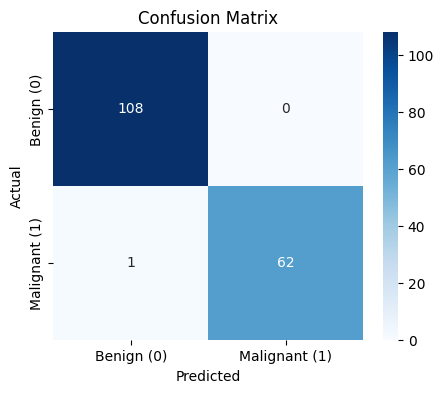

In [52]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()